# 1. Loading the dataset

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
#Loading the dataset
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


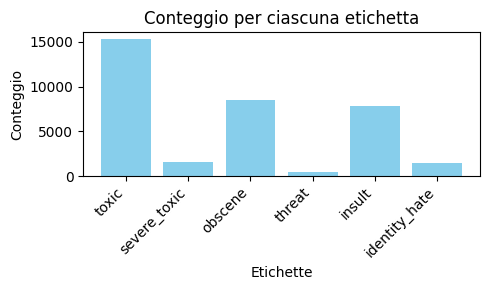

In [5]:
import matplotlib.pyplot as plt

# Counting occurrences of each label
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_counts = df[label_columns].sum()

plt.figure(figsize=(5,3))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Etichette')
plt.ylabel('Conteggio')
plt.title('Conteggio per ciascuna etichetta')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


# 2. Preprocessing of the data
### Working on comments text

In [6]:
#Importing the layer which consents to tokenize a text by converting it into a integers string
from tensorflow.keras.layers import TextVectorization

In [7]:
#Splitting the dataset in comments and other features
X = df['comment_text']
y = df[df.columns[2:]].values

In [8]:
#In TextVectorization is possible to specify the maximum number of words to analyze 
MAX_FEATURES = 200000 #if the training runs low it can decreased

In [9]:
#Initialize the vectorizer
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=1800, output_mode='int') #output_sequence can be modified

In [10]:
#Adapting the vectorizer to the dictionary of words find in the dataset
vectorizer.adapt(X.values)

In [11]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [12]:
#Referring to its 'new' vocabulary based on the dataset, the vectorizer return for each sentence a string of integer representing a specific word
vectorizer('Hello baby')

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([ 288, 2608,    0, ...,    0,    0,    0], dtype=int64)>

In [13]:
#Now all the comments text are passed to the vectorizer to obtain theri numerical rapresentation
vectorized_text = vectorizer(X.values)

In [14]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [15]:
#Create a pipeline to handle the dataset [MCSHBAP --> MAP, CACHE, SHUFFLE, BATCH and PREFETCH]
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [16]:
#Creating test, val and train partition from the dataset
train = dataset.take(int(len(dataset) * .7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)* .2))
test = dataset.skip(int(len(dataset)* .9)).take(int(len(dataset)* .1))

In [17]:
train.as_numpy_iterator().next()

(array([[     2,    263,    102, ...,      0,      0,      0],
        [  1492,   7944,    171, ...,      0,      0,      0],
        [    29,    472, 100252, ...,      0,      0,      0],
        ...,
        [  6867,    410,      2, ...,      0,      0,      0],
        [    46,    793,     36, ...,      0,      0,      0],
        [   416,     11,    602, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

# 3. Build NLP model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Bidirectional, Dense, Embedding
from tensorflow.keras.utils import to_categorical

In [19]:
model = Sequential()

# Explicically adding an input layer
model.add(Input(shape=(None,))) 

# Creating the embedding layer, represented by the max numb of words + 1 (for the unkown words), and each embedding is going to be 32 values long
model.add(Embedding(input_dim=MAX_FEATURES + 1, output_dim=32))

# Each LSTM is going to have 32 units activated by the tanh function
model.add(Bidirectional(LSTM(units=32, activation='tanh')))

# Fully connected layer for feature extraction 
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))

# Output layer
model.add(Dense(units=6, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
# Structure of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 32)       │     6,400,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,491,686 (24.76 MB)

 Trainable params: 6,491,686 (24.76 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(train, epochs = 10, validation_data=val)

Epoch 1/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2777s 397ms/step - loss: 0.0846 - val_loss: 0.0465
Epoch 2/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2687s 385ms/step - loss: 0.0454 - val_loss: 0.0400
Epoch 3/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2695s 386ms/step - loss: 0.0424 - val_loss: 0.0373
Epoch 4/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2723s 390ms/step - loss: 0.0374 - val_loss: 0.0348
Epoch 5/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2771s 397ms/step - loss: 0.0339 - val_loss: 0.0306
Epoch 6/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2746s 393ms/step - loss: 0.0300 - val_loss: 0.0269
Epoch 7/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2738s 392ms/step - loss: 0.0267 - val_loss: 0.0238
Epoch 8/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2734s 392ms/step - loss: 0.0246 - val_loss: 0.0211
Epoch 9/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2742s 393ms/step - loss: 0.0215 - val_loss: 0.0176
Epoch 10/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2725s 390ms/step - loss: 0.0192 - val_loss: 0.0160


<Figure size 800x500 with 0 Axes>

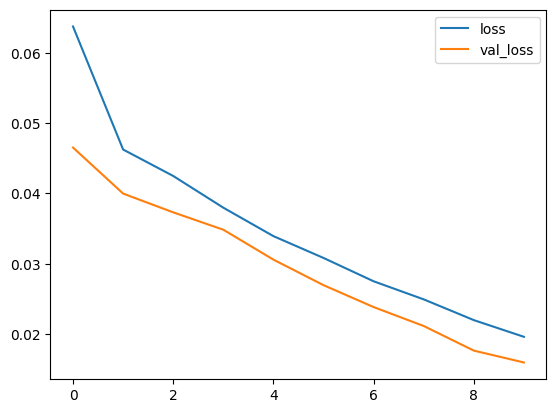

In [23]:
#Trend of the loss function during the epochs
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [24]:
#Saving toxicity model
model.save('toxicity_analyzer_10epoches.h5')

# 4. Making predictions

In [25]:
input_text = vectorizer('you fuking disgust me!')
batch = test.as_numpy_iterator().next()
res = model.predict(np.expand_dims(input_text,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


In [26]:
print(res)

[[9.9993026e-01 3.7874511e-01 9.9672598e-01 8.7160057e-05 3.8094482e-01
  1.8609673e-04]]


# 5. Evaluation

In [27]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [28]:
pre = Precision()
rec = Recall()
acc = CategoricalAccuracy()

In [29]:
#Measure predictions
#Scanning each batch in the pipeline of test dataset
for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch

    #Make prediciton on the batch
    yhat = model.predict(X_true)

    #Flatten the prediction in a single value array
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    #Evaluate the model
    pre.update_state(y_true, yhat)
    rec.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━

In [30]:
#Print results
print(f'Precision: {pre.result().numpy()},\n Recall: {rec.result().numpy()},\n Accuracy: {acc.result().numpy()}')

Precision: 0.9008013010025024,
 Recall: 0.9211641550064087,
 Accuracy: 0.498495489358902
